In [2]:
import pickle
import pandas as pd
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_labels_name(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data
train = unpickle('./cifar-100-python/train')
X_train = train.get(b'data')
y_train = train.get(b'fine_labels')

name = load_labels_name('./cifar-100-python/meta')

test = unpickle('./cifar-100-python/test')
X_test = test.get(b'data')
y_test = test.get(b'fine_labels')
print(X_test.shape)

(10000, 3072)


In [5]:
# vistualize sample image
# from PIL import Image
# %matplotlib inline
from matplotlib import pyplot as plt

X_train=X_train.reshape(-1,3,32,32)
X_train=np.rollaxis(X_train, 1, 4)
X_test=X_test.reshape(-1,3,32,32)
X_test=np.rollaxis(X_test, 1, 4)
X_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'apple')

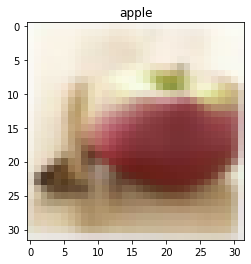

In [6]:
plt.figure(figsize=(4,4))
index = 2
plt.rcParams["axes.grid"] = False
plt.imshow(X_train[index])
plt.title(name['fine_label_names'][y_train[index]])

In [7]:
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# print(X_train)

X_train = X_train / 255.0
X_test = X_test / 255.0

CNN

In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
# Create the model
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [11]:
# Model configuration
batch_size = 256
verbosity = 1
epochs = 50

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train, batch_size=batch_size,
            epochs=epochs,
            verbose=verbosity,validation_split=0.2)

Epoch 1/50
157/157 [==============================] - 48s 300ms/step - loss: 4.2189 - accuracy: 0.0545 - val_loss: 3.9363 - val_accuracy: 0.1000
Epoch 2/50
157/157 [==============================] - 47s 298ms/step - loss: 3.6949 - accuracy: 0.1365 - val_loss: 3.5260 - val_accuracy: 0.1600
Epoch 3/50
157/157 [==============================] - 47s 299ms/step - loss: 3.3707 - accuracy: 0.1885 - val_loss: 3.3162 - val_accuracy: 0.1932
Epoch 4/50
157/157 [==============================] - 47s 298ms/step - loss: 3.1455 - accuracy: 0.2290 - val_loss: 3.1793 - val_accuracy: 0.2229
Epoch 5/50
157/157 [==============================] - 47s 299ms/step - loss: 2.9889 - accuracy: 0.2563 - val_loss: 3.0186 - val_accuracy: 0.2561
Epoch 6/50
157/157 [==============================] - 47s 300ms/step - loss: 2.8632 - accuracy: 0.2809 - val_loss: 3.0198 - val_accuracy: 0.2601
Epoch 7/50
157/157 [==============================] - 47s 300ms/step - loss: 2.7629 - accuracy: 0.3003 - val_loss: 2.8678 - val_ac

In [12]:
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 4s 12ms/step - loss: 3.8395 - accuracy: 0.3620
Test loss: 3.8395190238952637 / Test accuracy: 0.3619999885559082


              precision    recall  f1-score   support

           0       0.66      0.61      0.64       100
           1       0.53      0.36      0.43       100
           2       0.44      0.21      0.28       100
           3       0.16      0.16      0.16       100
           4       0.17      0.16      0.16       100
           5       0.31      0.33      0.32       100
           6       0.43      0.40      0.41       100
           7       0.48      0.28      0.35       100
           8       0.61      0.33      0.43       100
           9       0.42      0.49      0.45       100
          10       0.18      0.18      0.18       100
          11       0.30      0.31      0.31       100
          12       0.45      0.42      0.44       100
          13       0.32      0.20      0.25       100
          14       0.27      0.30      0.28       100
          15       0.26      0.26      0.26       100
          16       0.35      0.34      0.35       100
          17       0.61    

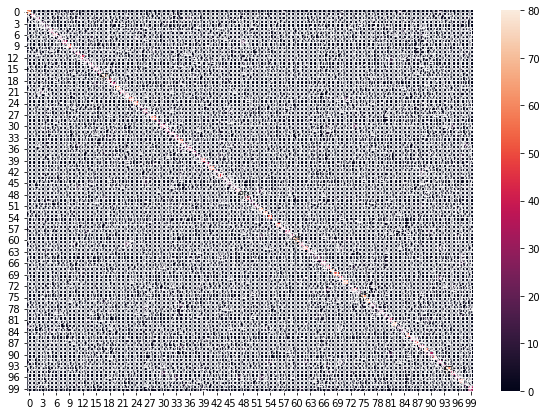

In [14]:
from sklearn import metrics
import seaborn as sn
actual = y_test
y_prob = model.predict(X_test)
predicted = np.argmax(y_prob,axis=1)
print(metrics.classification_report(actual, predicted))

# show the confusion matrix
print("confusion matrix:")
m = metrics.confusion_matrix(actual, predicted)
print(m)
mplot = pd.DataFrame(m)
plt.figure(figsize=(10,7))
sn.heatmap(mplot,annot = True)
plt.show()

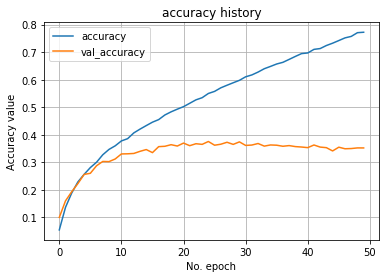

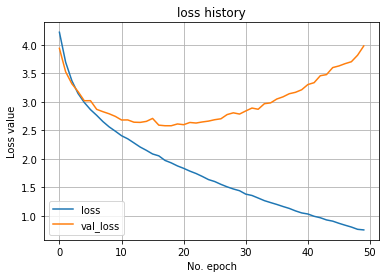

In [15]:
# Plot history: Accuracy
plt.plot(range(epochs), history.history['accuracy'], label='accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy history')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend()
plt.grid(True)
plt.show()

# Visualize history
# Plot history: Loss
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.title('loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
model.save('cnn_model.h5')